# Pymaceuticals Inc.
---

### Analysis

- &nbsp;&nbsp;&nbsp;Within this notebook there are multiple points we can analyze. First off with the bar charts, the two most successful drug regimens were Capomulin and Ramicane. Both had a mean tumor volume vastly lower than the rest, and also had more timepoints than the rest. The mouse population was very close to 50/50 sex, about 49/51 split by sex. Within the boxplots we found that infubinol had an outlier, which is marked in red. This was determined by our for loop.  
- &nbsp;&nbsp;&nbsp;For the Line and Scatter plots, there was a small amount of code to determine Mice that had the capomulin drug regimen, however the one that was chosen was random, only criteria was that it had 10 timepoints, therefore giving more data to graph. Within the line graph we found that over the course of time, tumor size would fall. With the scatter plot we also determined that the mice who had larger tumors also weighed more.
- &nbsp;&nbsp;&nbsp;This last fact is very important when analyzing the data, if one were preforming drug trials on mice of two different weights, the tumor volume would very likely differ as well, so an absolute value of start/ending tumor volume would not be telling the whole story. A ratio would be more fit, or comparing mice that are the same weight, either are preferable. 
 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

In [2]:
# Combine the data into a single DataFrame
merged1_df = pd.merge(study_results, mouse_metadata, on="Mouse ID",how="inner")
# Display the data table for preview
merged1_df.head(5)

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22


In [3]:
# Checking the number of mice.
unique_mouse_id = len(merged1_df['Mouse ID'].unique())
print(unique_mouse_id)

249


In [4]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_time_df = merged1_df[merged1_df.duplicated(subset=['Mouse ID','Timepoint'],keep=False)]
duplicate_mice_ids = duplicate_time_df["Mouse ID"].unique()
duplicate_mice_ids

array(['g989'], dtype=object)

In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_df=merged1_df.drop(merged1_df[merged1_df['Mouse ID']=='g989'].index)

In [6]:
# Checking the number of mice in the clean DataFrame.
len(clean_df['Mouse ID'].unique())

248

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
regimen_grouped = clean_df.groupby('Drug Regimen')
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)
summary_stats = regimen_grouped['Tumor Volume (mm3)'].agg(['mean', 'median','var','std','sem'])
summary_stats.columns = ['Mean Tumor Volume','Median Tumor Volume','Variance Tumor Volume','Tumor Volume Std. Dev.','Tumor Volume Std. Err.']
summary_stats

,Mean Tumor Volume,Median Tumor Volume,Variance Tumor Volume,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


# Bar and Pie Charts

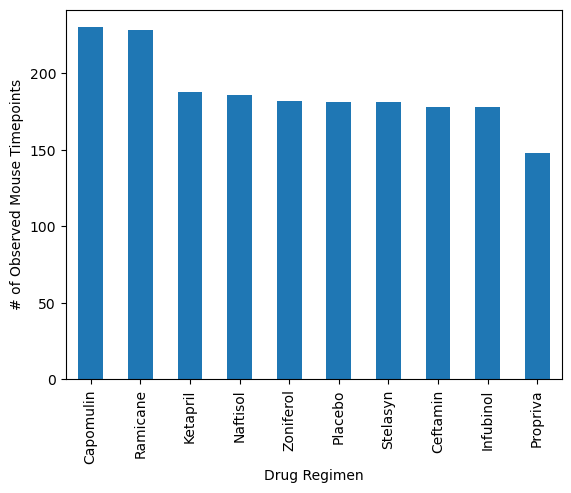

In [8]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
drug_time_df = regimen_grouped['Timepoint'].count().sort_values(ascending=False)
bar_plot_drug_panda = drug_time_df.plot.bar(ylabel="# of Observed Mouse Timepoints")


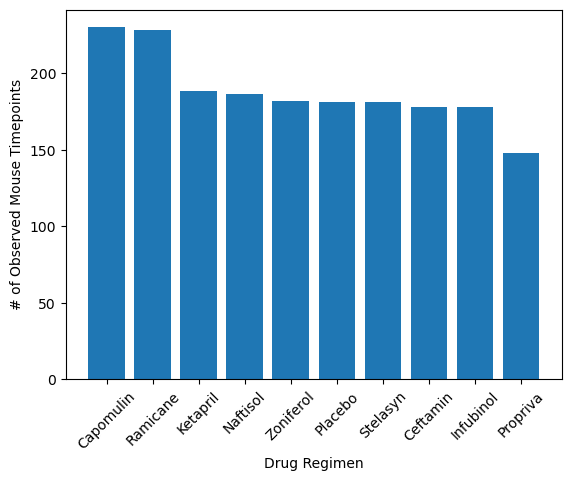

In [9]:
#Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
plt.bar(drug_time_df.index, drug_time_df.values)
plt.xticks(rotation=45)
plt.xlabel('Drug Regimen')
plt.ylabel('# of Observed Mouse Timepoints')
plt.show()

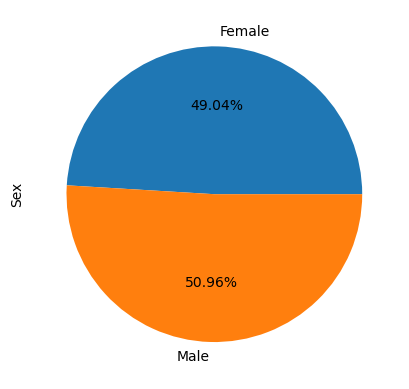

In [10]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
sex_mice = clean_df.groupby('Sex')
sex_mice_df = sex_mice['Sex'].count()
sex_mice_pie_plot = sex_mice_df.plot.pie(ylabel="Sex",autopct="%.2f%%")

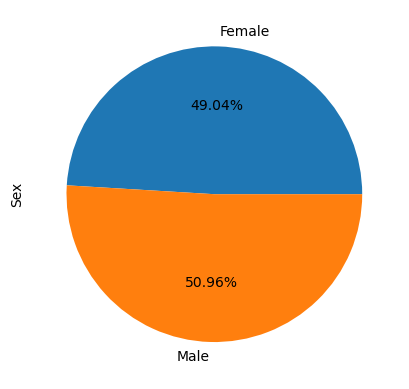

In [11]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
plt.pie(sex_mice_df, labels=sex_mice_df.index,autopct='%.2f%%')
plt.ylabel('Sex')
plt.show()

## Quartiles, Outliers and Boxplots

In [12]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
final_tumor_vol = clean_df.groupby('Mouse ID')['Timepoint'].max().reset_index()
final_tumor_vol.columns = ['Mouse ID','Timepoint']

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
tumor_vol_df = pd.merge(clean_df, final_tumor_vol, on=['Mouse ID','Timepoint'], how='inner')
tumor_vol_df

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,45,38.982878,2,Capomulin,Female,9,22
1,f932,0,45.000000,0,Ketapril,Male,15,29
2,g107,35,71.905117,0,Ketapril,Female,2,29
3,a457,10,49.783419,0,Ketapril,Female,11,30
4,c819,40,62.175705,1,Ketapril,Male,21,25
...,...,...,...,...,...,...,...,...
243,t565,45,34.455298,0,Capomulin,Female,20,17
244,i557,45,47.685963,1,Capomulin,Female,1,24
245,m957,45,33.329098,1,Capomulin,Female,3,19
246,f966,20,30.485985,0,Capomulin,Male,16,17


In [13]:
# Put treatments into a list for for loop (and later for plot labels)
treatments = ['Capomulin', 'Ramicane','Infubinol','Ceftamin']

# Create empty list to fill with tumor vol data (for plotting)
tumor_data = {}
# Calculate the IQR and quantitatively determine if there are any potential outliers. 
for treatment in treatments:
    # Locate the rows which contain mice on each drug and get the tumor volumes
    subset=tumor_vol_df[tumor_vol_df['Drug Regimen']==treatment]['Tumor Volume (mm3)']
    
    quartiles = subset.quantile([0.25,0.75])
    Q1 = quartiles[0.25]
    Q3 = quartiles[0.75]
    IQR = Q3-Q1
    # Determine outliers using upper and lower bounds
    lower_bound= Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    outliers = subset[(subset<lower_bound)|(subset > upper_bound)]
    print(f' Potential outliers for {treatment}: {outliers}')
    tumor_data[treatment] = subset

 Potential outliers for Capomulin: Series([], Name: Tumor Volume (mm3), dtype: float64)
 Potential outliers for Ramicane: Series([], Name: Tumor Volume (mm3), dtype: float64)
 Potential outliers for Infubinol: 29    36.321346
Name: Tumor Volume (mm3), dtype: float64
 Potential outliers for Ceftamin: Series([], Name: Tumor Volume (mm3), dtype: float64)


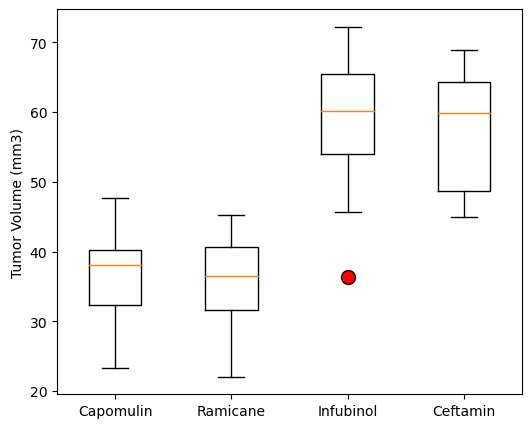

In [14]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
plt.figure(figsize=(6,5))
box_plot = plt.boxplot(tumor_data.values(), labels=tumor_data.keys())
for i, treatment in enumerate(tumor_data.keys()):
    outliers = box_plot['fliers'][i]
    for outlier in outliers.get_ydata():
        plt.plot(i+1, outlier, 'ro', markersize=10,markeredgecolor='black')
plt.ylabel('Tumor Volume (mm3)')
plt.show()

## Line and Scatter Plots

In [15]:
#Code to find desired treatment, and mouse with high amount of data points
drug_regimen_lookup = clean_df.loc[clean_df['Drug Regimen']=='Capomulin']
print(drug_regimen_lookup['Mouse ID'].unique())
mouse_count = drug_regimen_lookup['Mouse ID'].value_counts().head(10)
print(mouse_count)
chosen_mouse = drug_regimen_lookup.loc[drug_regimen_lookup['Mouse ID']=='g288']
chosen_mouse

['b128' 'j246' 'r554' 's185' 'b742' 'x401' 'l509' 's710' 'r157' 'u364'
 'j119' 'v923' 'w914' 'i738' 'r944' 'y793' 'g316' 'g288' 'l897' 'w150'
 't565' 'i557' 'm957' 'f966' 'm601']
Mouse ID
b128    10
v923    10
m957    10
i557    10
t565    10
l897    10
g288    10
g316    10
y793    10
r944    10
Name: count, dtype: int64


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
1825,g288,0,45.000000,0,Capomulin,Male,3,19
1826,g288,5,45.839400,0,Capomulin,Male,3,19
1827,g288,10,46.304003,1,Capomulin,Male,3,19
1828,g288,15,42.172301,1,Capomulin,Male,3,19
1829,g288,20,42.957120,1,Capomulin,Male,3,19
1830,g288,25,42.368692,1,Capomulin,Male,3,19
1831,g288,30,42.874461,1,Capomulin,Male,3,19
1832,g288,35,38.954115,1,Capomulin,Male,3,19
1833,g288,40,36.356851,1,Capomulin,Male,3,19
1834,g288,45,37.074024,1,Capomulin,Male,3,19


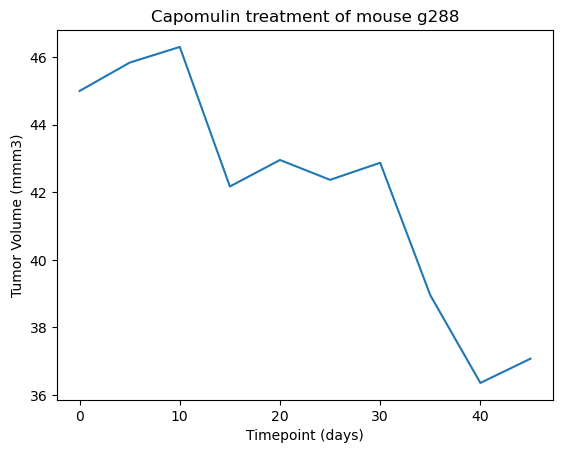

In [16]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
plt.plot(chosen_mouse['Timepoint'], chosen_mouse['Tumor Volume (mm3)'])
plt.xlabel('Timepoint (days)')
plt.ylabel('Tumor Volume (mmm3)')
plt.title('Capomulin treatment of mouse g288')
plt.show()

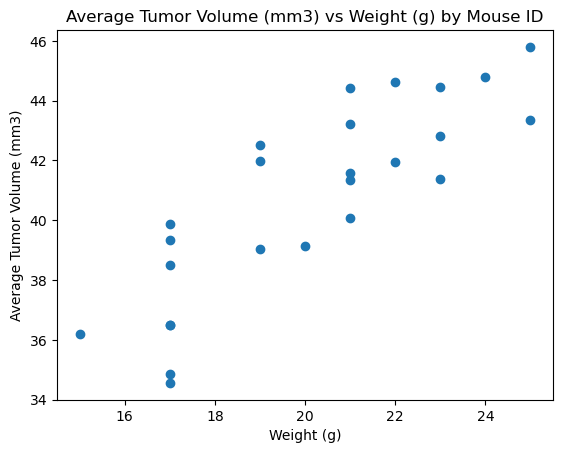

In [17]:
#Obtaining and creating dataframe grouped by Mouse ID containing weight, tumor volume.
avg_tumor_volume = drug_regimen_lookup.groupby('Mouse ID').agg({'Tumor Volume (mm3)':'mean','Weight (g)':'first'}).reset_index()
avg_tumor_volume.columns = ['Mouse ID', 'Average Tumor Volume (mm3)','Weight (g)']
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
plt.scatter(avg_tumor_volume['Weight (g)'], avg_tumor_volume['Average Tumor Volume (mm3)'])
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.title('Average Tumor Volume (mm3) vs Weight (g) by Mouse ID')
plt.show()

## Correlation and Regression

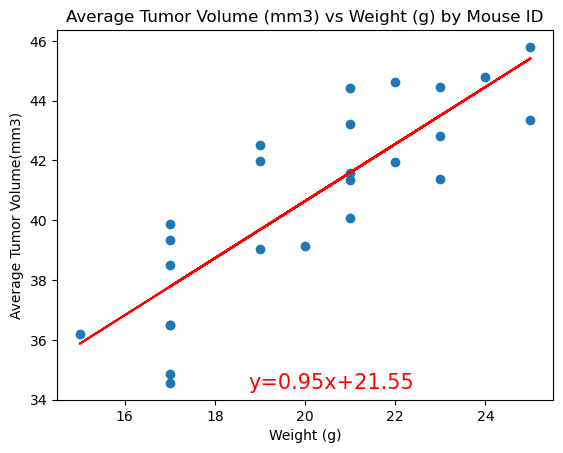

The r-value is:0.8419363424694721.
This means the correlation between weight of a mouse and the average tumor size is 0.84
Positive correlation.


In [18]:
# Calculate the correlation coefficient and a linear regression model 
def linear_regression_plot(x,y,x_label,y_label,title):
    slope, intercept, r_value, p_value, std_err = st.linregress(x,y)
    line = slope * x + intercept
    equation = 'y=' + str(round(slope,2))+"x+"+str(round(intercept,2))
    plt.scatter(x,y)
    plt.plot(x,line,color='red')
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.title(title)
    annotation_x = max(x-(x/4))
    annotation_y = max(y-(y/4))
    plt.annotate(equation, (annotation_x, annotation_y),fontsize=15,color="red")
    plt.show()
    print(f'The r-value is:{r_value}.')
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
xyz = linear_regression_plot(avg_tumor_volume['Weight (g)'],
                      avg_tumor_volume['Average Tumor Volume (mm3)'],
                      'Weight (g)',
                      'Average Tumor Volume(mm3)',
                      'Average Tumor Volume (mm3) vs Weight (g) by Mouse ID')
print('This means the correlation between weight of a mouse and the average tumor size is 0.84')
print('Positive correlation.')